In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

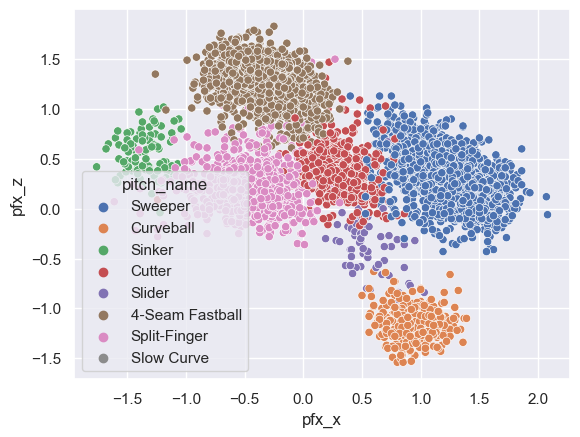

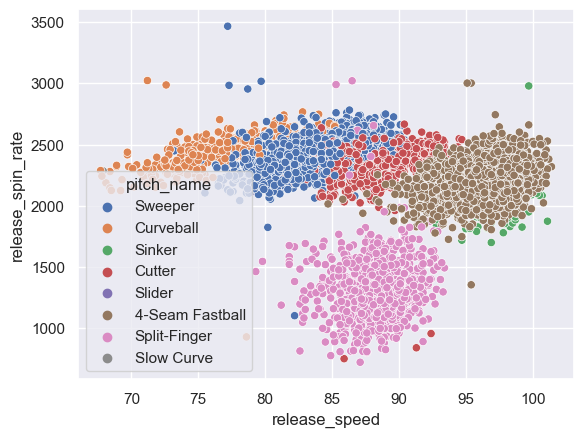

In [31]:

data = pd.read_csv("data/savant_data.csv")


pitches = data[['pitch_type', 'release_speed', 'release_pos_x', 'release_spin_rate', 'release_extension', 'spin_axis',
       'release_pos_z', 'stand', 'zone', 'description', 'balls', 'strikes', 'game_year', 'inning', 'outs_when_up',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
       'pitch_number', 'pitch_name']]

sns.scatterplot(x='pfx_x', y='pfx_z', data=pitches, hue='pitch_name' )
plt.show()
sns.scatterplot(x='release_speed', y='release_spin_rate', data=pitches, hue='pitch_name' )
plt.show()


In [ ]:
pitch_by_count = pitches.groupby(['pitch_number', 'pitch_name'])[['pitch_name']].agg(count=("pitch_name", "count"))
print(pitch_by_count)
sns.scatterplot(x='pitch_number', y='count', data=pitch_by_count, hue='pitch_name')

R    2877
L    2712
Name: stand, dtype: int64


<Axes: xlabel='stand', ylabel='count'>

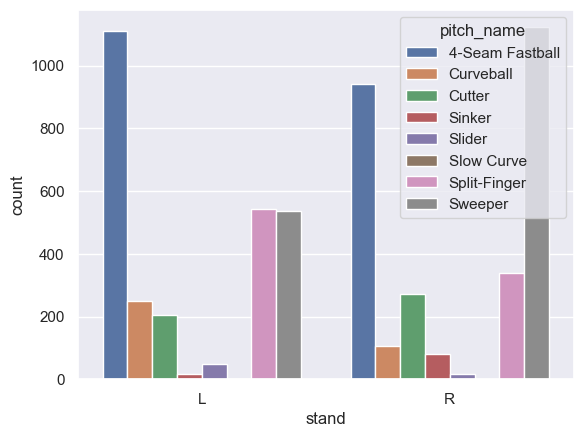

In [76]:
pitch_by_stand = pitches.groupby(['stand', 'pitch_name'])[['pitch_name']].agg(count=("pitch_name", "count"))
print(pitches['stand'].value_counts())
pitch_by_stand.reset_index(inplace=True)
sns.barplot(x='stand', y='count', data=pitch_by_stand, hue='pitch_name')

Shohei didn't pitch in 2019 due to having Tommy Johns surgery, but he still batted.

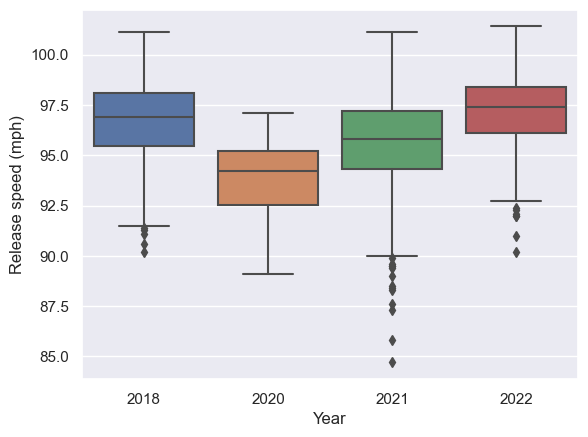

In [20]:
fastballs = pitches[pitches['pitch_type'] == 'FF']
fb_by_year = fastballs.groupby('game_year')[['release_spin_rate', 'release_speed']].mean()

_ = sns.boxplot(x='game_year', y='release_speed', data=fastballs)
_ = plt.xlabel('Year')
_ = plt.ylabel('Release speed (mph)')
plt.show()